# Assignment #1 - Linear Regression

Manisha Sathanur <br/>
801069595

## Data Introduction
__The dataset is a sample of the transactions made in a retail store taken from kaggle.
The store wants to know  the customer purchase behaviour against different products. We can use 
regression problem where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.__

### The dataset consists of the following attributes:
- User_ID: id of User
- Product_ID: Id Product
- GenderBoolean: gender of each user
- Age: customer age
- OccupationId: Occupation of each customer
- City_Category: There are 3 A, B and C. each custormer belongs to one of these 3
- Stay_In_Current_City_Years: since when the custormer is staying in the current city. The values are 1, 2,3 or 4+
- Marital_Status: marital status of each custormer is married or unmarried
- Product_Category_1
- Product_Category_2
- Product_Category_3
- Purchase: Purchase amount in dollars. This is the output variable.

## Data Reading 
Read data from .csv file using pandas

In [62]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [63]:
dataset=pd.read_csv("blackfriday.csv")
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Obervation: the data set contains missing values NaN for Product_Category_1 and Product_Category_2. these values need to be handled as part of data preprossing.

 ## DATA PREPROSSING
- __Rename attribute names for consistency by removing special characters from them__ 
- __Change all variable types to number as we are dealing with regrression which would need values in the form of numbers__
- __Handle missing values for Product_Category_1 and Product_Category_2__
- __Change cityCategory to catogorical as we have 3 citites A, B and C the catogorical values would be 1, 2 and 3__ 
- __Change marital_status to binary that is married is 1 and unmarried is 0__
- __Change the value of 4+ in the attribute stay_in_current_city_year to 4__

In [64]:
dataset.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [65]:
#convert column headers to lower case
#remove special characters from cloumn header and rename few cloumns 
dataset.columns = ['userid', 'productid', 'gender', 'age', 'occupation', 'citycategory',
       'stayyearscity', 'maritalstatus', 'prodcat1',
       'prodcat2', 'prodcat3', 'purchase']

### Replace 0s and 1s in the Marital status column in order to make the attribute binary

In [66]:

dataset['maritalstatus'] = dataset['maritalstatus'].replace(0, 'Unmarried')
dataset['maritalstatus'] = dataset['maritalstatus'].replace(1, 'Married')
dataset.dtypes

userid             int64
productid         object
gender            object
age               object
occupation         int64
citycategory      object
stayyearscity     object
maritalstatus     object
prodcat1           int64
prodcat2         float64
prodcat3         float64
purchase           int64
dtype: object

### The stayyearscity contians 4+ which needs to be replaced to 4 . This will make the attribute catagorical

In [67]:
dataset.dtypes

userid             int64
productid         object
gender            object
age               object
occupation         int64
citycategory      object
stayyearscity     object
maritalstatus     object
prodcat1           int64
prodcat2         float64
prodcat3         float64
purchase           int64
dtype: object

In [68]:
dataset_orig = dataset.copy()

In [69]:
from sklearn.preprocessing import LabelEncoder
encode_x = LabelEncoder()

## Encoding the columns to make the data fit for regression

In [70]:
# Encoding columns 
dataset['productid'] = encode_x.fit_transform(dataset['productid'])
dataset['gender'] = encode_x.fit_transform(dataset['gender'])
dataset['age'] = encode_x.fit_transform(dataset['age'])
dataset['citycategory'] = encode_x.fit_transform(dataset['citycategory'])
dataset['maritalstatus'] = encode_x.fit_transform(dataset['maritalstatus'])
dataset['stayyearscity'] = encode_x.fit_transform(dataset['stayyearscity'])

__replacing the 'NaN' with 0s and can be assumed as 'missing' category value__

In [71]:
dataset['prodcat2'].fillna(value=0,inplace=True)
dataset['prodcat3'].fillna(value=0,inplace=True)
# check for missing values (NaN) in the dataset
dataset.isna().any()

userid           False
productid        False
gender           False
age              False
occupation       False
citycategory     False
stayyearscity    False
maritalstatus    False
prodcat1         False
prodcat2         False
prodcat3         False
purchase         False
dtype: bool

In [72]:
dataset.dtypes

userid             int64
productid          int64
gender             int64
age                int64
occupation         int64
citycategory       int64
stayyearscity      int64
maritalstatus      int64
prodcat1           int64
prodcat2         float64
prodcat3         float64
purchase           int64
dtype: object

In [73]:
dataset['stayyearscity'] = dataset['stayyearscity'].replace('4+', 4)
dataset.dtypes

userid             int64
productid          int64
gender             int64
age                int64
occupation         int64
citycategory       int64
stayyearscity      int64
maritalstatus      int64
prodcat1           int64
prodcat2         float64
prodcat3         float64
purchase           int64
dtype: object

## Visualisations
__to get the column labels instead of 0's and 1's we can use the dataset_orig for visualisation__

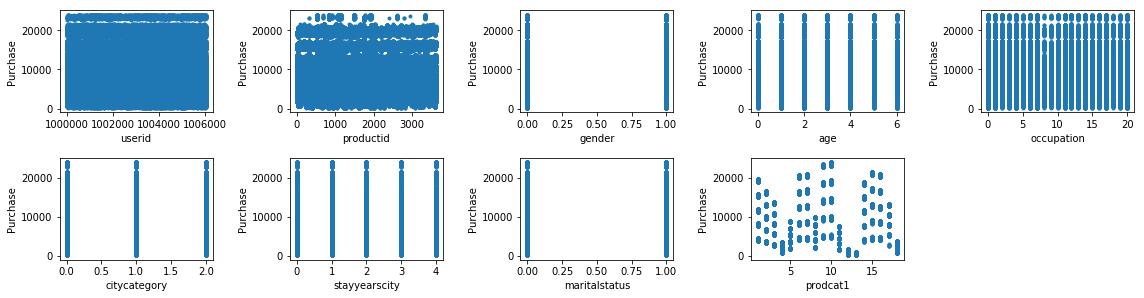

In [74]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(9):
    plt.subplot(6, 5, i+1)
    plt.plot(dataset.iloc[:,i],dataset.purchase, '.')
    plt.xlabel(dataset.columns.values[i])
    plt.ylabel("Purchase")
fig.tight_layout()

In [75]:
group_1 = dataset.groupby(['gender'])
group_2 = dataset.groupby(["age"])
group_3 = dataset.groupby(["citycategory"])
group_4 = dataset.groupby(["occupation"])

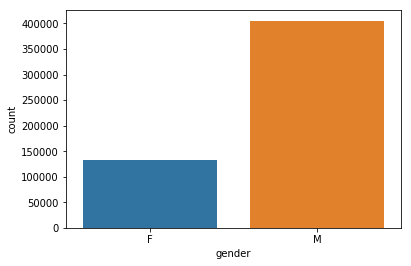

In [76]:
sb.countplot(dataset_orig['gender'])

 ## Observations: 
__it can be seen from the above bar graph that the number of male are more then the number of female shoppers
for this retail store__

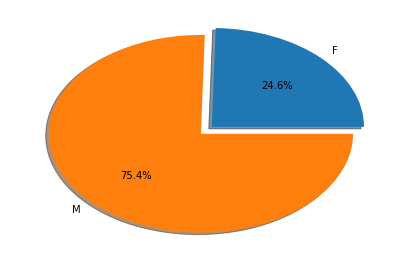

In [77]:
plt.figure(figsize=(15,10))

# Pie chart for gender distribution
plt.subplot(2,2,1)
gender_count = [dataset_orig.gender[dataset_orig['gender']=='F'].count(),
                dataset_orig.gender[dataset_orig['gender']=='M'].count()]
gender_lab = dataset_orig.gender.unique()
expl = (0.1,0)
plt.pie(gender_count, labels=gender_lab, explode=expl, shadow=True , autopct='%1.1f%%');

## Observations:
__aproximately 75% of the total shoppers where male and the remianing 25% where female shopper__

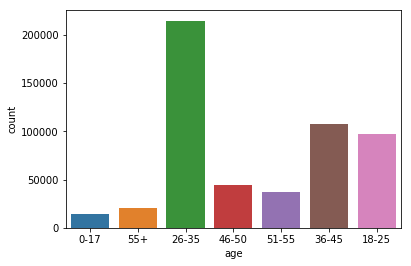

In [78]:
sb.countplot(dataset_orig['age'])

## Observations: 
__from the above graph it can be seen that the people between the age of 26 to 35 vistied the store most during blackfriday but this not mean that people in that age group have spend the most.__

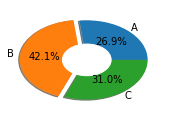

In [79]:
# Donut chart for City Category
plt.subplot(2,2,4)
city_count = group_3[['purchase']].count().values.tolist()
city_lab = dataset_orig.groupby(["citycategory"]).count().index.values
my_circle = plt.Circle( (0,0), 0.4, color='white')
expl1 = (0,0.1,0)
plt.pie(city_count, labels=city_lab,explode=expl1, shadow=True, autopct='%1.1f%%')
plt.gcf().gca().add_artist(my_circle)
plt.show()

## Observations:
__shoppers from city B came the most to the store followed by C and then A. 
few reasons could be that maybe the other cities had better shopping options or maybe the people in city B have high income or the people in city B use the products sold in this retail store the most due to weather or some other conditions.__
__the type of products is not mentioned in the data set. If this information was given it would have been easier to predict the reason for such pattern. And also the distance from the store to each city is not mentioned. That could also be a reason for this pattern.
Hence the data given is insufficient for further anlysis.__

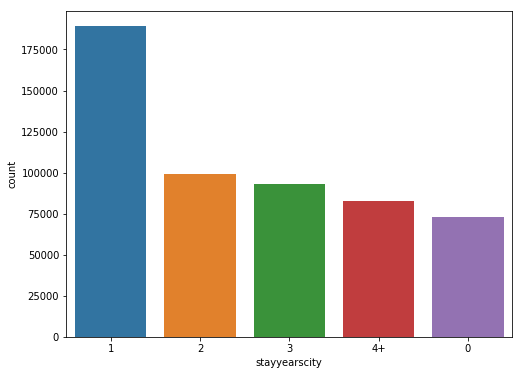

In [80]:
plt.figure(figsize=(8,6))
ordr2 =dataset_orig.groupby(["stayyearscity"]).count().sort_values(by='purchase',ascending=False).index
sb.countplot(dataset_orig['stayyearscity'], label=True, order=ordr2)
plt.show()

## Observations:
__people who have started staying in their respective cities since just a year have visited the store more. As the number of years they have stayed increased the purchase rate decreased.
This could be because people who are new tend to explore and roam around more as one gets settled they might prefer to stay home.
Another reason could be that the people new could need to buy more inorder to settle in to they new home.__

In [81]:
#Creating new column in the dataset 
dataset_orig['gender_maritalstatus'] = dataset_orig.apply(lambda x:'%s_%s' % (x['gender'],x['maritalstatus']),axis=1)
dataset_orig.gender_maritalstatus.unique()

array(['F_Unmarried', 'M_Unmarried', 'M_Married', 'F_Married'],
      dtype=object)

In [82]:
#group by for gender and marital status
group_5 = dataset_orig.groupby(["gender_maritalstatus"])

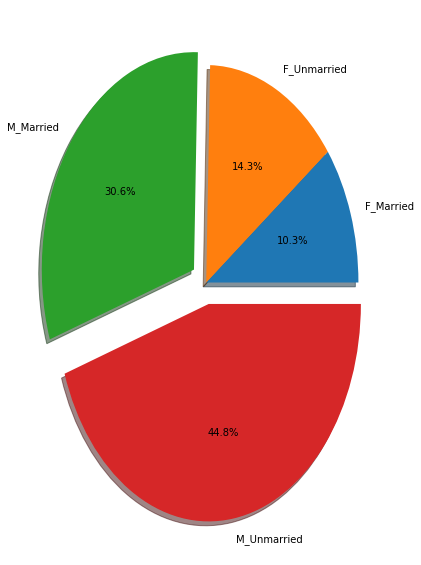

In [83]:
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
count1 = group_5[['purchase']].count().values.tolist()
lab1 = dataset_orig.groupby(["gender_maritalstatus"]).count().index.values
expl2 = (0,0,0.1,0.1)
plt.pie(count1, labels=lab1,explode=expl2, shadow=True, autopct='%1.1f%%')
plt.show()

## Observation : 
__from chart above the number of unmarried shoppers are more then the married shoppers for both male and female. As unmarried people tend to have more time to shop then people who are married__

C:\Users\Manisha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


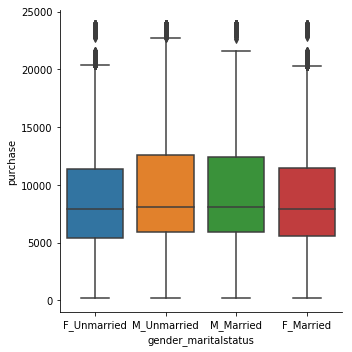

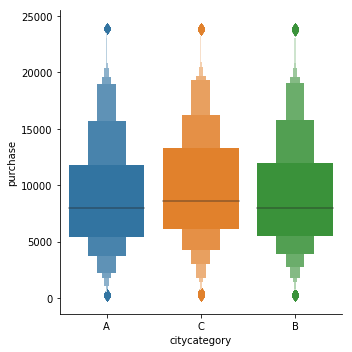

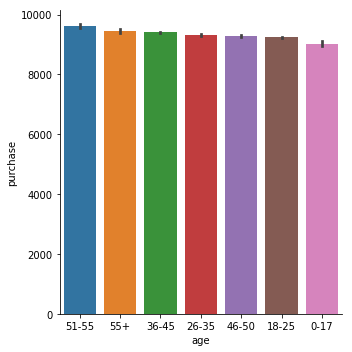

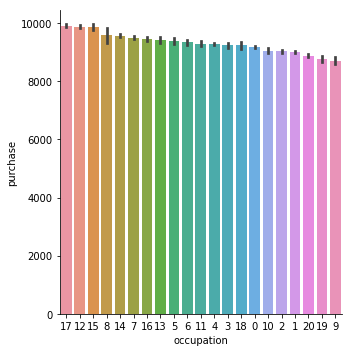

In [84]:
#bar chart for purchase vs (age,occupation, marritial status and city)
sb.catplot(x='gender_maritalstatus', y='purchase', data=dataset_orig, kind='box')

sb.catplot(x='citycategory', y='purchase', data=dataset_orig, kind='boxen')
ordr_occ =dataset_orig.groupby(["age"]).mean().sort_values(by='purchase',ascending=False).index
sb.catplot(x='age', y='purchase', order=ordr_occ, data=dataset_orig, kind='bar')

ordr_occ =dataset_orig.groupby(["occupation"]).mean().sort_values(by='purchase',ascending=False).index
sb.catplot(x='occupation', y='purchase', order=ordr_occ, data=dataset_orig, kind='bar')
plt.show()

## Observations :
- __Males spend more than females__
- __Age factor : People who have earned more (spend more time working) and have saved enough money, tend to spend more then the other shoppers. The least spenders are from the age 0-17.This could be because__ 
- __Occupation codes 17, 12 and 15 appears to be earning more and accordingly spend more__
- __People living in Category C city appears to spend more in the mall__

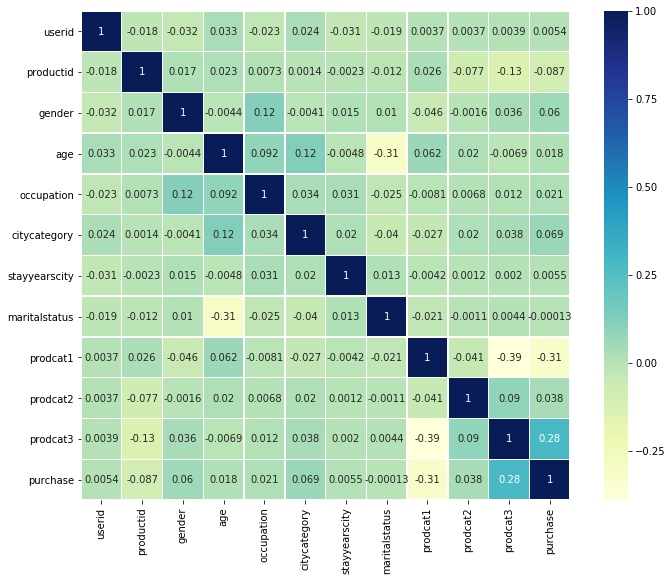

In [85]:
correlation = dataset.corr()
f, ax = plt.subplots(figsize=(12, 9))
sb.heatmap(correlation, vmax=1, cmap="YlGnBu", square=True,linewidths=.5, annot=True)
plt.show()

## Obeservations:
__from the correlation matrix it can be seen that citycategory and gender and the most correlated columns to purchase__

## Linear Rregression
__Linear Rregression is a statistical approach for modelling relation between a dependent variable with a given set of independent variables. The task is to find the line which fits best with the training data so that we can predict the response for any new feature values. This line is called the regression line__

## Review
In linear models we perform the dot product of x and w, where w is the weight matrix and x is the feature matrix. We compute w using two techniques they are:

- Least Squares
- Least Mean Squares

I have a base class called BaseModel which has two abstract methods train and use and these methods are implemented in the respective classes. A Linear model class which is inheriting the base model has the methods to check the matrix and ones to a matrix. The classes Linear Regress and LMS are the ones that are used for calculating least squares and least mean squares respectively. In both the methods I use the train step to compute the value of w and the 'use' method to compute the dot product



## Explanation of code
### Linear Squares:
__Train function__
Takes two arguments __predictors array__ and the __target values array__ as input.'1' is added to all the rows of the predictors array. Then we calulate the weights array using input values as follows :<br/>
  <br/> w = (np.linalg.inv(X1.T @ X1) @ X1.T @ T) <br/> 
__Use function__
Use function is used to test the trained model. It takes a single array of new predictors as input and returns the list of predicted target values as output. 1's are added to each of the rows and the target values are calculated using the available weight array as follows:<br/>
                        <br/> y = X1 @ self.w <br/>
                         
### Linear Least Mean Squares:
__Train function__
 The __predictors array__ and the __target values array__ are taken as inputs. It iteratively sends a row of both the input arrays to the train_step function. The train_step function first initializes the weight to zeroes array if it is not initialized before. 1's column is added to the row and the new weight is calculated using: <br/>
                <br/>   w = w - alpha(x@w - t)x.T <br/>
The train_step function modifies the weight values as new rows are given to it. 
The __use function__ is similar to that of the least square' use method.

## Super Class :

In [86]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

In [87]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):

        self._check_matrix(X, 'X')
        N = X.shape[0]
        X1 = np.hstack((np.ones((N, 1)), X))
        #self.w = np.linalg.lstsq(X1.T @ X1) @ X1.T @ T 
        self.w = np.linalg.lstsq(X1.T @ X1, X1.T @ T)[0]  ## TODO: replace this with your codes
    
    # apply the learned model to data X
    def use(self, X):
        self._check_matrix(X, 'X')
        N = X.shape[0]
        X1 = np.hstack((np.ones((N, 1)), X))
        return X1 @ self.w
        pass  ## TODO: replace this with your codes

## Least Square

In [88]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        self._check_matrix(X, 'X')
        N = X.shape[0]
        X1 = np.hstack((np.ones((N, 1)), X))
        #self.w = np.linalg.inv(X1.T @ X1) @ X1.T @ T 
        self.w = np.linalg.lstsq(X1.T @ X1, X1.T @ T)[0]
    
    # apply the learned model to data X
    def use(self, X):
        self._check_matrix(X, 'X')
        N = X.shape[0]
        X1 = np.hstack((np.ones((N, 1)), X))
        return X1 @ self.w
        pass  ## TODO: replace this with your codes

## Least Mean Squares

In [89]:

import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        N = X.shape[0]
        for k in range(N):
            self.train_step(X[k],T[k])
        pass 
    
    
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t): 
        le=len(x)
        #print(len(x))
        #print (type(x))
    
        #x = np.hstack((np.ones((x.shape[0], 1)), x.reshape((1,le))))
        x = x.reshape(1,le)
        x = np.hstack((np.ones((x.shape[0], 1)), x))
        if(self.w is None):
            self.w =np.zeros((x.shape[1],1))
       # print(self.w.shape)
        y=x @ self.w
        k=self.alpha * (y-t) * x
        k=k.reshape(k.shape[1],-1)
        #print(k.shape)
        self.w -= k
        
        pass  ## TODO: replace this with your codes
    
    # apply the current model to data X
    
    def use(self, X):
        N = X.shape[0]
        X1 = np.hstack((np.ones((N, 1)), X))
        return X1 @ self.w
        pass  ## TODO: replace this with your codes

## Test Model

C:\Users\Manisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


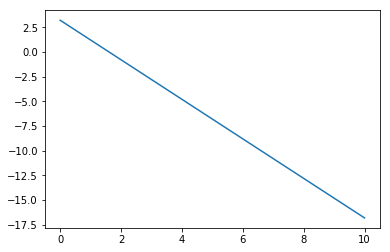

In [90]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

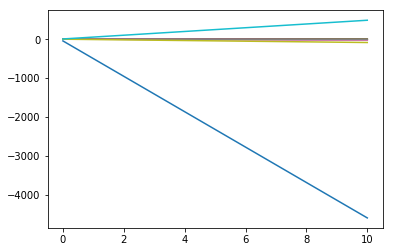

In [91]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

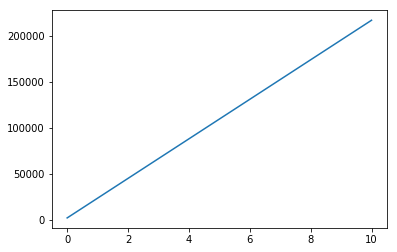

In [92]:
lms.train(X, T)
plt.plot(lms.use(X))

## Preliminary Test

In [137]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )

training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


C:\Users\Manisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


## Least square Implementation on Black Friday data set

Least Squares and Least Mean Square methods are computed for blcak friday data set. The feautures are made in a seperate matrix called X, and the target variable, purchase is dropped from the dataframe and it is stored in a variable called T. 
Linear Regression class is called for the dataset.

In [175]:
T=dataset.iloc[:,1];
T=np.array(T)
T.shape

(537577,)

In [176]:
T=T.reshape(T.size,1)
T.shape

(537577, 1)

__Drop cloumns that are not needed for annalyzing__

In [177]:
dataset.dtypes

userid             int64
productid          int64
gender             int64
age                int64
occupation         int64
citycategory       int64
stayyearscity      int64
maritalstatus      int64
prodcat1           int64
prodcat2         float64
prodcat3         float64
purchase           int64
dtype: object

In [270]:
X=dataset
X=X.drop('userid',axis=1)
X=X.drop('productid',axis=1)
X=X.drop('purchase',axis=1)
#X=X.drop('prodcat1',axis=1)
#X=X.drop('prodcat2',axis=1)
#X=X.drop('prodcat3',axis=1)

X.shape

(537577, 9)

In [180]:
Tlog = np.log(T + 1)
Tlog.shape


(537577, 1)

In [181]:
lg=LinearRegress()
lg.train(X, Tlog)

C:\Users\Manisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [182]:

Y = lg.use(X)
E = Tlog-Y
E

array([[-0.61817916],
       [ 0.90654264],
       [-0.37767292],
       ...,
       [ 0.9808966 ],
       [ 0.65414164],
       [-0.19528858]])

In [183]:
np.sqrt(np.mean((Tlog - Y)**2))

1.0578212137212055

## Normalizing the data for Least square Implementation

Data is normalized to manage any huge values that are present in the data set. Normalization helps in providing better results and more informative weights

In [184]:
mu = X.mean() 
std = X.std()
nX = (X - mu) / std

In [185]:
lg=LinearRegress()
lg.train(nX, Tlog)

C:\Users\Manisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [186]:
Y = lg.use(nX)
E = Tlog-Y
E

array([[-0.61817916],
       [ 0.90654264],
       [-0.37767292],
       ...,
       [ 0.9808966 ],
       [ 0.65414164],
       [-0.19528858]])

In [187]:
(Tlog - Y)**2

array([[0.38214547],
       [0.82181956],
       [0.14263683],
       ...,
       [0.96215814],
       [0.42790128],
       [0.03813763]])

In [188]:
np.mean((Tlog - Y)**2)

1.1189857201986044

In [189]:
np.sqrt(np.mean((Tlog - Y)**2))

1.0578212137212055

In [211]:
r2_score(Tlog, Y)

0.01241842385362546

## Observation 
The value is 1.05 both before and after normalizing the data . This could mean that the data does not contain any values with greate variance

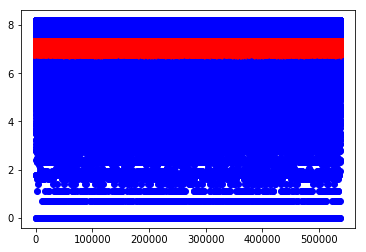

In [191]:
plt.plot(Tlog, 'ob')
plt.plot(Y, 'xr')

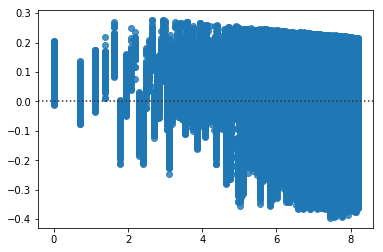

In [192]:
sb.residplot(np.array(Tlog),np.array(Y))

## Least mean square Implementation using Normalized data

In [193]:
nlms=np.array(nX)
nlms.shape

(537577, 9)

In [235]:
lems = LMS(0.01)
lems.train(nlms, Tlog)

In [221]:
lems = LMS(0.0001)
lems.train(nlms, Tlog)

In [236]:
Y2 = lems.use(nlms)
E = Tlog-Y2
E

array([[-0.35692815],
       [ 0.88315848],
       [-0.0485132 ],
       ...,
       [ 1.03023554],
       [ 0.62249406],
       [-0.19581601]])

In [237]:
(Tlog - Y2)**2

array([[0.12739771],
       [0.77996889],
       [0.00235353],
       ...,
       [1.06138527],
       [0.38749885],
       [0.03834391]])

In [238]:
np.mean((Tlog - Y2)**2)

1.1763657074412224

In [239]:
np.sqrt(np.mean((Tlog - Y2)**2))

1.0846039403585175

In [240]:
r2_score(Tlog, Y)

0.01241842385362546

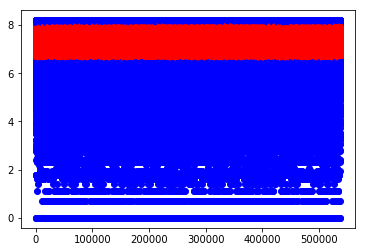

In [233]:
plt.plot(Tlog, 'ob')
plt.plot(Y2, 'xr')

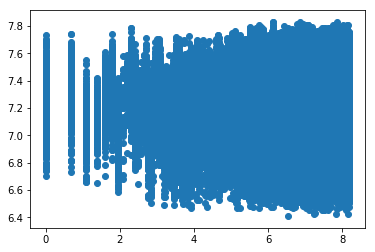

In [264]:
plt.scatter(Tlog,Y2)

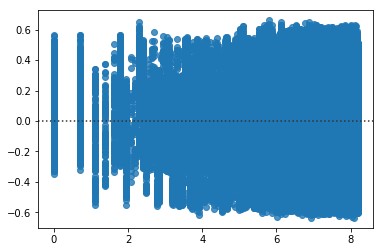

In [234]:
sb.residplot(Tlog,Y2)

## Partitioning the data for train and test

In [204]:
def normalize(X):
    mu = X.mean() 
    std = X.std()
    return (X - mu) / std

In [205]:

xlms=normalize(X)
ylms=normalize(T)

In [206]:
from sklearn.model_selection import train_test_split
X_tr, X_test, T_tr, T_test = train_test_split(xlms, ylms, test_size = 0.33, random_state = 5)

print(X_tr.shape)

print(X_test.shape)

print(T_tr.shape)
print(T_test.shape)

(360176, 9)
(177401, 9)
(360176, 1)
(177401, 1)


## Least Square Implementation on Train and Test data

In [207]:
plg=LinearRegress()
plg.train(X_tr, T_tr)

C:\Users\Manisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [208]:
Ypred = plg.use(X_test)

In [209]:
E = T_test-Ypred
E

array([[-0.79026065],
       [ 0.78140376],
       [-1.68440928],
       ...,
       [-0.35916832],
       [ 0.1334413 ],
       [-1.31642686]])

In [124]:
np.sqrt(np.mean((T_test - Ypred)**2))

0.9890243662914757

In [125]:
from sklearn.metrics import r2_score
r2_score(T_test, Ypred)

0.023185348613619317

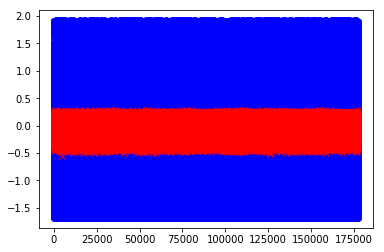

In [126]:
plt.plot(T_test, 'ob')
plt.plot(Ypred, 'xr')

In [127]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

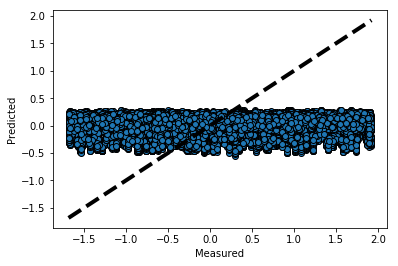

In [128]:
fig, ax = plt.subplots()
ax.scatter(T_test, Ypred, edgecolors=(0, 0, 0))
ax.plot([T_test.min(), T_test.max()], [T_test.min(), T_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

After implementing the least squares linear model on the data I noticed the following observations :

- It is considering the data as a whole and computing the result.
- After performing LS on the whole data set and on the partitioned dataset I noticed that the even though the model is able to     predict the data, the Root mean square error is high and the prediction is not accurate.
- RMS value for partioned data is 0.9 and r square value is 0.02
- This model is not apt for predicting the ouput variable as ot can be seen that it has high rmse value but low r square value.
- Future models may be able to predict the data accurately

## Least Mean Square Implementation on Train and Test Data

Similar to the least square computation, the train values of x and y are passed to train function and the test value of x is passed to use function and the ytest and the predicted y are compared



In [129]:
xtr=np.array(X_tr)

In [253]:
pems = LMS(0.01)
pems.train(xtr,T_tr)

In [254]:
Ypredm = pems.use(X_test)
E = T_test-Ypredm
E

array([[-0.93590968],
       [ 0.75562057],
       [-1.8543559 ],
       ...,
       [-0.31302637],
       [ 0.111486  ],
       [-1.74982922]])

In [255]:
np.sqrt(np.mean((T_test - Ypredm)**2))

1.0264414968554

In [256]:
r2_score(T_test, Ypredm)

-0.05212317065369443

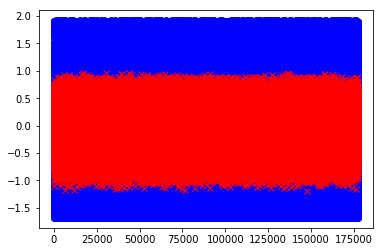

In [257]:
plt.plot(T_test, 'ob')
plt.plot(Ypredm, 'xr')

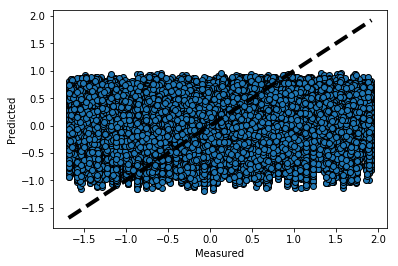

In [258]:

fig, ax = plt.subplots()
ax.scatter(T_test, Ypredm, edgecolors=(0, 0, 0))
ax.plot([T_test.min(), T_test.max()], [T_test.min(), T_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

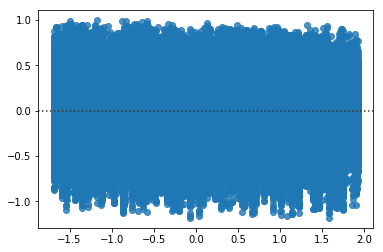

In [259]:
sb.residplot(T_test,Ypredm)

In [260]:
pems = LMS(0.02)
pems.train(xtr,T_tr)

In [261]:
Ypredm = pems.use(X_test)
E = T_test-Ypredm
E

array([[-1.11262448],
       [ 0.69504346],
       [-2.06598101],
       ...,
       [-0.36134644],
       [ 0.05224863],
       [-2.11289661]])

In [262]:
np.sqrt(np.mean((T_test - Ypredm)**2))

1.0791322157510412

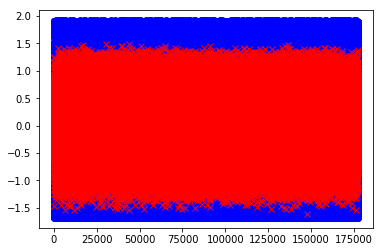

In [263]:
plt.plot(T_test, 'ob')
plt.plot(Ypredm, 'xr')

## Observation :
The graph has a better fit for learning rate of 0.2 then for 0.1.
As the learning rate increases the rmse value is increased.
When the learning rate is set to 0.001 the rmse value is decrased.

## Analysis
I implemented the linear model for all the train and test at once, then partitioned the data to train and test, using scikit learn package and performed the learn process on the train data and them implemented using the test data.

- When implementing the linear model for the data as a whole I did not find any deviation and the error was very minimum to 1.05 for LS, and 1.08 for LMS
- implenented LMS for different learning rates. The r square value does not change with changei n learning rate but the value increses as learning rate increases
- The r square value for the data is 0.12 for both LS and LMS which is not great for a model
- When the data is split to train and test where 33% of the data was used to train the model and the rest of the data is used in  prediction, the r square value for LS is 0.2 which is not so great for a model
- The r square value is 0.05 for LMS for the test data which in not a good model at all.
- After plotting the actual and predicted in both the graphs using the scatter plot, it is visible that there is error in the function

## Comparisons
The comparison here is between the two models implemented, least square(LS) and least mean square(LMS)
Based on the data set and analysing the plots after implementation of the models, it is clearly seen that

- Least Squares model is better for smaller data sets as there is no approximation and it is considering the data as a whole.
- In least Squares the computation of inverse is very costly for large data sets
- Least Mean Squares is most suitable for large number of data sets, as it uses the concept of gradient descendent and uses approximation
- As there is no inverse calculation for large data sets it is better option to choose.
- The error value is more in the case of Least Mean squares than Least Squares.
- Normalization did not add any help to the data and the RMSE value remained the same in both the cases after normalization
- I observed that this was not very effective in predicting the target value for my dataset and may be future models will help on this

## Conclusion
This task helped us in clearly understanding  the aspects of linear model and the implementation of least squares and least mean squares on a dataset. The major issues or challenges I faced for working with is the dimesions of the matrix. I learnt how to reshape them accordingly and how to consider object arrays. Also computation of inverse which might yield to singular matrix and handling it. Splitting the train and test data, normalizing the data, residual plots of the data are interesting to work with.

## Extra Credicts


#### what is the most and least significant features for your data.
- the most significant features of the black friday database are product catogory 1 , 2 and 3 . This can be seen from the confusion matrix. These values effect the purcase amount the most beacuse obviously the cost of the products can be predicted most from the catogory to which the product belongs.
- Marrital status is the least significant features of the black friday data set. This could be because an individuals marrital status willnot effect the final output. 


### what are the consequences if you remove most significant features from the model? (Show your work!)

In [267]:
T=dataset.iloc[:,1];
T=np.array(T)
T.shape

(537577,)

In [268]:
T=T.reshape(T.size,1)
T.shape

(537577, 1)

In [271]:
dataset.dtypes

userid             int64
productid          int64
gender             int64
age                int64
occupation         int64
citycategory       int64
stayyearscity      int64
maritalstatus      int64
prodcat1           int64
prodcat2         float64
prodcat3         float64
purchase           int64
dtype: object

In [288]:
X=dataset
X=X.drop('userid',axis=1)
X=X.drop('productid',axis=1)
X=X.drop('purchase',axis=1)
# X=X.drop('gender',axis=1)
# X=X.drop('citycategory',axis=1)
X=X.drop('prodcat3',axis=1)
X=X.drop('prodcat1',axis=1)
X=X.drop('prodcat2',axis=1)

X.shape

(537577, 6)

In [289]:
Tlog = np.log(T + 1)
Tlog.shape

(537577, 1)

In [298]:
lg=LinearRegress()
lg.train(X, Tlog)

C:\Users\Manisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [291]:
Y = lg.use(X)
E = Tlog-Y
E

array([[-0.51053554],
       [ 0.75344804],
       [-0.27289255],
       ...,
       [ 0.97345103],
       [ 0.7812527 ],
       [-0.13943203]])

In [292]:
np.sqrt(np.mean((Tlog - Y)**2))

1.063726816690059

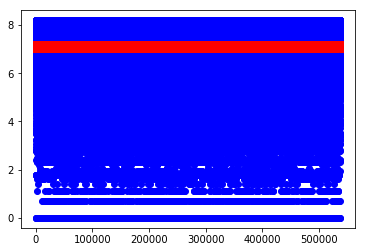

In [293]:
plt.plot(Tlog, 'ob')
plt.plot(Y, 'xr')

### what are the consequences if you remove most significant features from the model? (Show your work!)

In [299]:
T=dataset.iloc[:,1];
T=np.array(T)
T.shape

(537577,)

In [300]:
T=T.reshape(T.size,1)
T.shape

(537577, 1)

In [306]:
X=dataset
X=X.drop('userid',axis=1)
X=X.drop('productid',axis=1)
X=X.drop('purchase',axis=1)
# X=X.drop('gender',axis=1)
X=X.drop('maritalstatus',axis=1)
X.shape

(537577, 8)

In [307]:
Tlog = np.log(T + 1)
Tlog.shape

(537577, 1)

In [308]:
lg=LinearRegress()
lg.train(X, Tlog)

C:\Users\Manisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [309]:
Y = lg.use(X)
E = Tlog-Y
E

array([[-0.6193705 ],
       [ 0.90538664],
       [-0.37886483],
       ...,
       [ 0.97675443],
       [ 0.64994778],
       [-0.19945477]])

In [310]:
np.sqrt(np.mean((Tlog - Y)**2))

1.0578294101228147

## Observation:
- The rmse value which represents the error rate was 1.05 when the most siginificant value was not removed previously.
- The rmse value  increases when the most significant values whoch are product catogory 1,product catogory 2 and product       catogory3 are removed which means that the error rate has incresed.
- When the least significant value which is the marrital status of a user is removed it has no effect on the rmse value.

__produce residual plots and observe the patterns for the goodness of fit__

In [313]:
X=dataset
X=X.drop('userid',axis=1)
X=X.drop('productid',axis=1)
X=X.drop('purchase',axis=1)

In [314]:
lg=LinearRegress()
lg.train(X, Tlog)

C:\Users\Manisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [315]:
Y = lg.use(X)
E = Tlog-Y

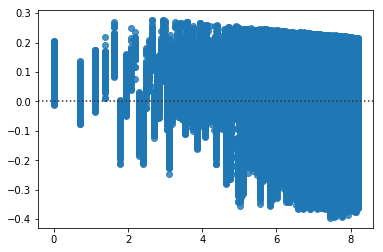

In [317]:
sb.residplot(Tlog,Y)

## Observation 
The blackfriday dataset does not follow linar regression model hence the goodness of the fit is worst.This can also be seen fromthe residplot plotted above using seaborn package.
This can also be seen from the r square value which is very low for this particular data set and also the rmse value is quite high.

## References
 - Dataset Information, https://www.kaggle.com/mehdidag/black-friday
 - Few ideas for visualization from https://www.kaggle.com/mehdidag/black-friday/kernels
 - Basics of python https://www.tutorialspoint.com/python/
 - Visualizing Https://Matplotlib.org/
 - Seaborn.pydata.org/tutorial/distributions.html.
 - https://stackoverflow.com/questions/41494358/spyder-python-object-arrays-are-currently-not-supported
 - http://scipy-lectures.org/packages/scikit-learn/index.html
